<a href="https://colab.research.google.com/github/liuxiu842/ML/blob/master/dolphins_GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

feature_representations=
 {'Beak': array([ 1.16835102, -0.5806947 ]), 'Beescratch': array([ 0.98367662, -0.36570975]), 'Bumper': array([ 0.33574367, -0.31437997]), 'CCL': array([ 0.6754082 , -0.99851414]), 'Cross': array([-0.67832221,  0.86426046]), 'DN16': array([0.50087767, 0.34452208]), 'DN21': array([0.57578535, 0.16907317]), 'DN63': array([ 1.05896453, -0.30957341]), 'Double': array([ 0.6196385 , -0.82123587]), 'Feather': array([0.33719144, 0.24144602]), 'Fish': array([ 0.75393559, -0.452042  ]), 'Five': array([0.66332526, 0.09610194]), 'Fork': array([ 1.13528655, -0.96995212]), 'Gallatin': array([0.34132777, 0.20603576]), 'Grin': array([ 0.97554874, -0.80851164]), 'Haecksel': array([ 1.05239503, -0.20780045]), 'Hook': array([ 1.03613987, -0.83041609]), 'Jet': array([ 1.15629107, -0.36011361]), 'Jonah': array([ 0.40125907, -0.07261238]), 'Knit': array([ 0.93327196, -0.2389114 ]), 'Kringel': array([ 0.71463676, -0.80660249]), 'MN105': array([ 0.27612296, -0.02203384]), 'MN23': arra

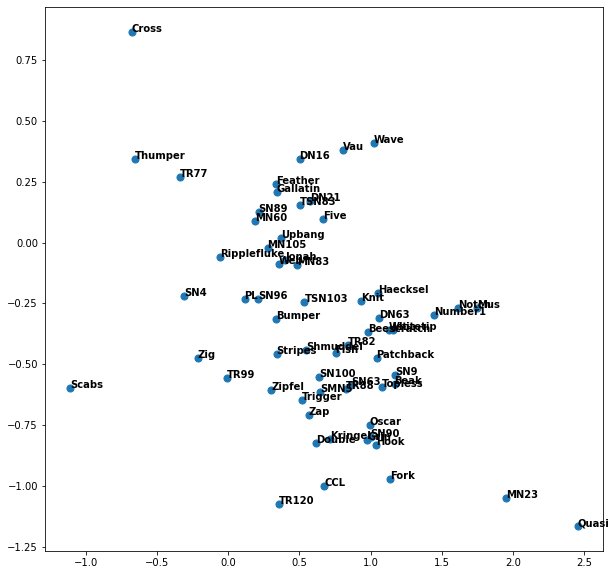

In [11]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

# 数据加载，构造图
G = nx.read_gml('/content/drive/My Drive/Colab Notebooks/L14/dolphins.gml')
# print(G)
# print(type(G))

# # 可视化
# plot_graph(G)
# print(list(G.nodes()))
# #print(G.nodes['Beak'])
# print(G.nodes)


# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
#print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
#print('A=\n', A) 

# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
#print('A_hat=\n', A_hat)

# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
#print('D_hat=\n', D_hat)
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
#print('D_hat=\n', D_hat)


# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
#print('W_1=\n', W_1)
#print('W_2=\n', W_2)

# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
#print("output(去掉relu)=\n:",output)



# 在二维空间中绘制所选节点的向量
def plot_nodes(output):
    # 创建一个散点图的投影
    plt.figure(figsize=(10,10))
    D2 = np.array(output)
    #print('D2', D2)
    plt.scatter(D2[:, 0], D2[:, 1],50)
    feature_representations = {}
    nodes = list(G.nodes())
    for i in range(len(nodes)):
        feature_representations[nodes[i]] = np.array(output)[i]
    print('feature_representations=\n', feature_representations)
    
    for key1, value1 in feature_representations.items():
        # print('key1 is:', key1)
        # print('value1 is:', value1)
        plt.annotate(key1, xy=(value1[0], value1[1]),weight='demi')        
    plt.show()

plot_nodes(output)
    